#### 성년의 날
##### 매년 5월 셋째 월요일로 성인으로서의 책임감을 일깨워주는 목적으로 지정된 기념일이자 법정기념일
##### 성년의 날에는 신생 성인들에게 향수를 선물해주는 문화가 있습니다
##### 이를 확인하기 위해서 네이버와 카카오에서 제공하는 데이터를
##### 전체, 20대, 부모님세대, 기타(10대와 60대 이상)으로 구분하여 분석

In [1]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc
import warnings
warnings.simplefilter("ignore")

# 파일 경로 설정
DIR_PATH = './Data_jaehun/'

# 한글 폰트 설정
font_path = './Data_jaehun/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 여러 가지 데이터 파일의 이름을 딕셔너리로 저장
name_dic = {'naver_all.xlsx' : '전체(네이버)',
            'naver_else.xlsx' : '기타 세대(네이버)',
            'naver_target.xlsx' : '20대(네이버)',
            'naver_parent.xlsx' : '부모님 세대(네이버)',
            'kakao_all.xls' : '전체(카카오)',
            'kakao_else.xls' : '기타 세대(카카오)',
            'kakao_target.xls' : '20대(카카오)',
            'kakao_parent.xls' : '부모님 세대(카카오)',
            'shop_male.csv' : '쇼핑 데이터(20대 남성)',
            'shop_female.csv' : '쇼핑 데이터(20대 여성)',
            'shop_parent.csv' : '쇼핑 데이터(부모님)'
           }

In [2]:
# 데이터 정제화 함수
# 데이터들이 대부분 비슷한 형태를 띄고 있지만 약간의 차이점들이 존재
def checkdata(file):
    # name_dic 에서 사용할 자료 불러오기
    name = name_dic[file]
    if '쇼핑' not in name:
        # 파일을 데이터프레임 화
        if '네이버' in name :
            df = pd.read_excel(DIR_PATH + file,header=6)
            # 중복된 날짜컬럼 삭제
            df.drop(df.columns[2], axis = 1, inplace=True)
        elif '카카오' in name:
            df = pd.read_excel(DIR_PATH + file, header=7)
            # 뒤에 필요없는 부분 제거
            df = df[0:365]
            # '일' 컬럼명 '날짜'로 변환
            df.rename(columns={'일':'날짜'},inplace=True)
        # 향수와 성년 컬럼 타입을 float으로 변환
        df['향수'] = df['향수'].astype(float)
        df['성년'] = df['성년'].astype(float)
    else :
        df = pd.read_csv(DIR_PATH + file, header=8)
        # 데이터를 타입을 필요에 맞춰 변경
        df['남성향수'] = df['남성향수'].astype(float)
        df['여성향수'] = df['여성향수'].astype(float)
    # '날짜' 컬럼의 데이터를 datetime64로 변경(나중에 표의 x축에 활용)
    df['날짜'] = df['날짜'].astype('datetime64')
    
    ShowData(df, name)

In [3]:
# 데이터 시각화 함수
def ShowData(df, name):
    data_year = list(df['날짜'])
    data_list_01 = []
    data_list_02 = []
    
    # 0번째 인덱스는 날짜 데이터
    # 각 데이터를 각 데이터의 최대값으로 나눠 모두 0~1의 값을 나타내도록 변경
    for i in range(0, len(df.index)):
        data_01 = df[df.columns[1]][i]/df[df.columns[1]].max()
        data_02 = df[df.columns[2]][i]/df[df.columns[2]].max()
        data_list_01.append(data_01)
        data_list_02.append(data_02)
        
    # 그래프
    fig, ax = plt.subplots(figsize=(18,6))
    # 키워드 검색량 그래프의 경우 실선과 점으로 생성
    if '쇼핑' not in name :
        ax_1 = plt.plot(data_year, data_list_01, '-', label=(f'{df.columns[1]} 검색량'))
        ax_2 = plt.plot(data_year, data_list_02, 'o', color='red', ms=2.5, label=(f'{df.columns[2]} 검색량'))
        y_1, y_2 = 1, 0.8
        
    # 쇼핑 검색량 그래프의 경우 실선으로 생성
    else :
        ax_1 = plt.plot(data_year, data_list_01, '-', color='red', label=(f'{df.columns[1]} 검색량'))
        ax_2 = plt.plot(data_year, data_list_02, '-', label=(f'{df.columns[2]} 검색량'))
        y_1, y_2 = 0.7, 0.8
    ax.set_title(f'{name} 검색량 비교')
    # 2019년 5월 20일에 해당하는 부분에 화살표 추가
    plt.annotate('성년의 날', xy=(data_year[140], y_1), xytext=(data_year[150], y_2), arrowprops=dict(facecolor='black', shrink=0.05))
    ax.legend()
    plt.show()

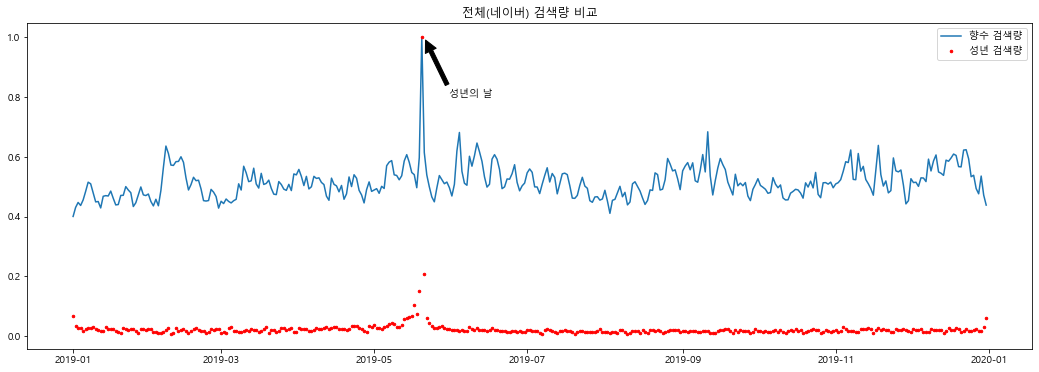

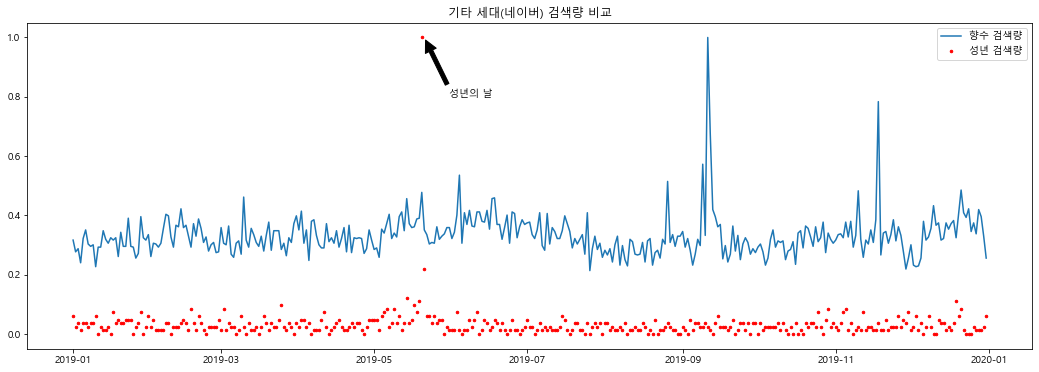

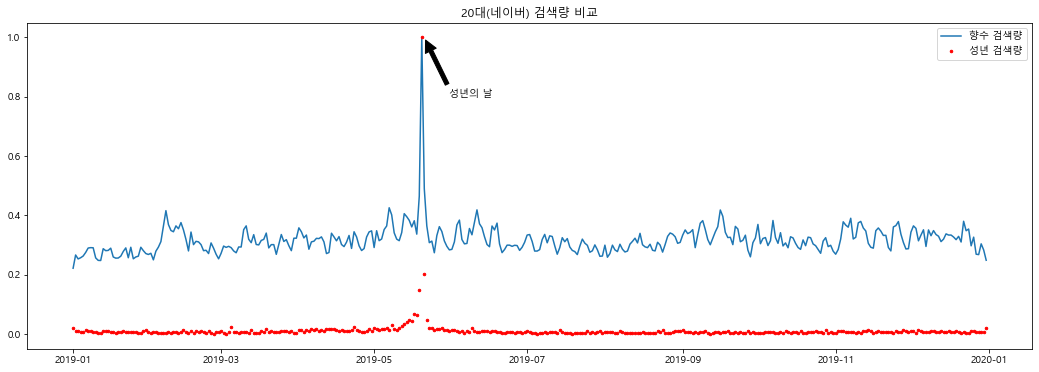

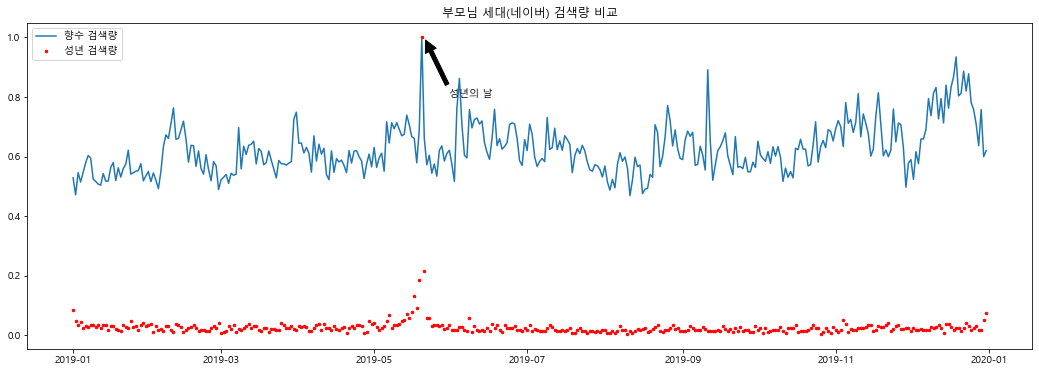

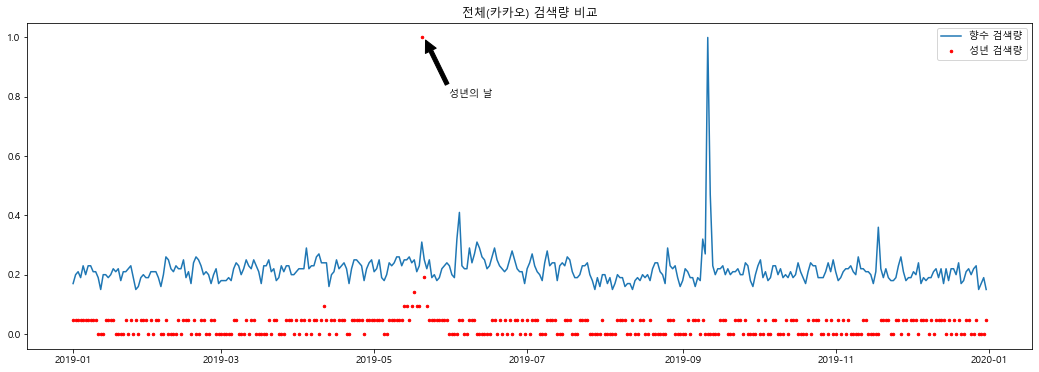

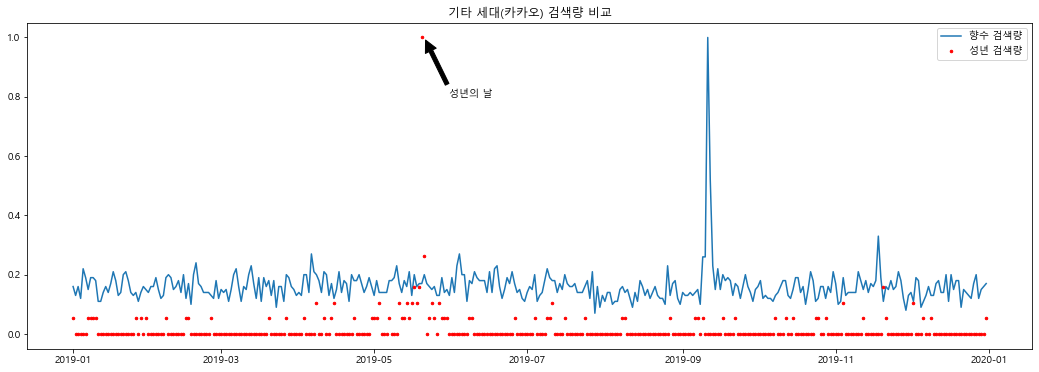

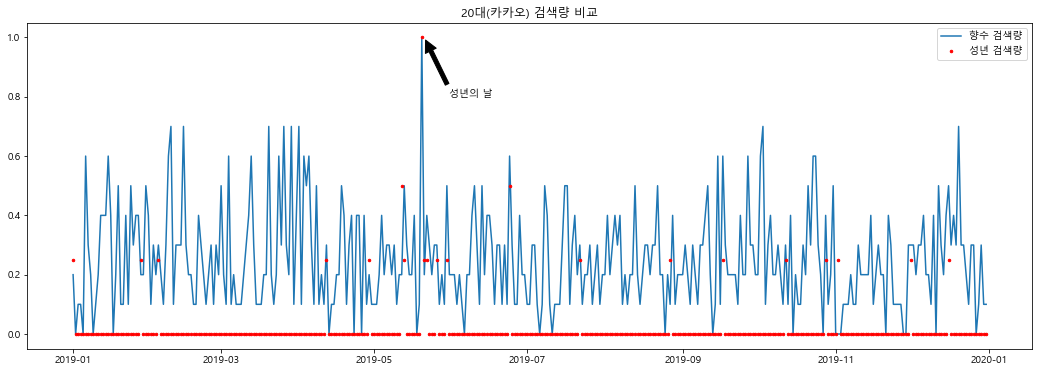

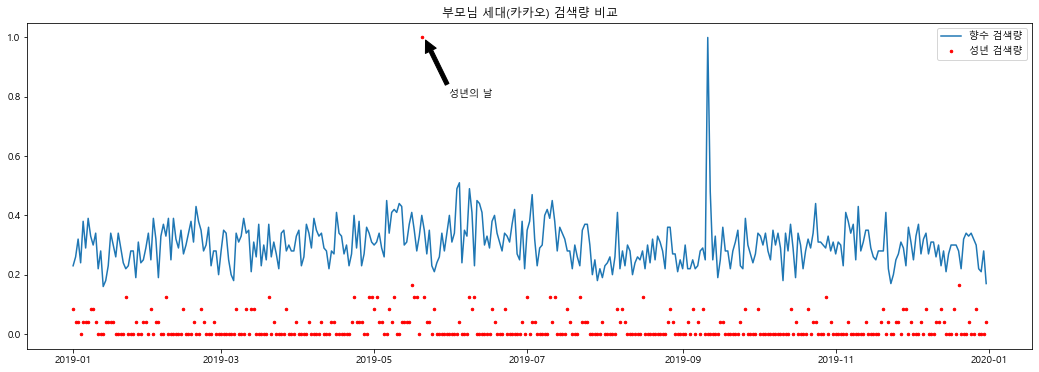

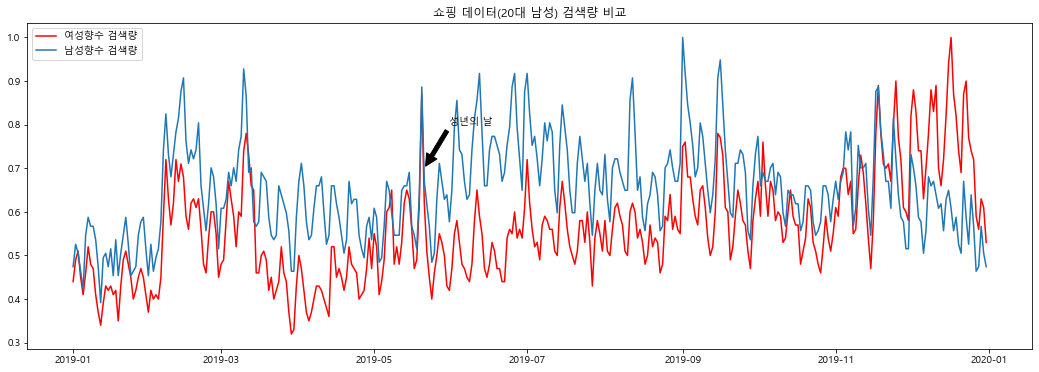

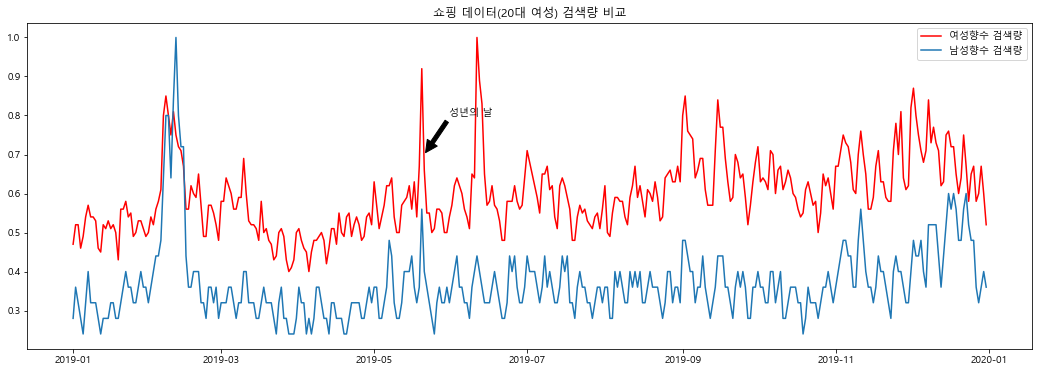

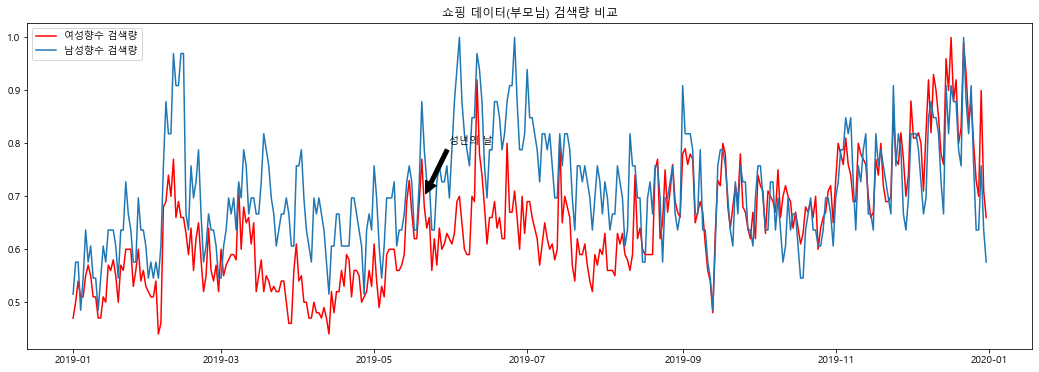

In [4]:
for i in range(0,len(name_dic.keys())):
    checkdata(list(name_dic.keys())[i])